# 讀取資料

In [1]:
from dataManager import getData

In [2]:
target_data = getData('M1800')

C:\Users\pured\桌面\0520上課教材\dataManager.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data['ret'] = target_data['收盤價(元)'].diff(1)/target_data['收盤價(元)'].shift(1)


# 資料視覺化

In [3]:
import matplotlib.pyplot as plt

In [4]:
target_data['收盤價(元)']

0       40.31
1       41.31
2       41.65
3       41.40
4       42.36
        ...  
5294    85.27
5295    77.21
5296    70.31
5297    63.51
5298    69.62
Name: 收盤價(元), Length: 5299, dtype: float64

In [5]:
test_data = target_data['收盤價(元)']

#### 收盤價

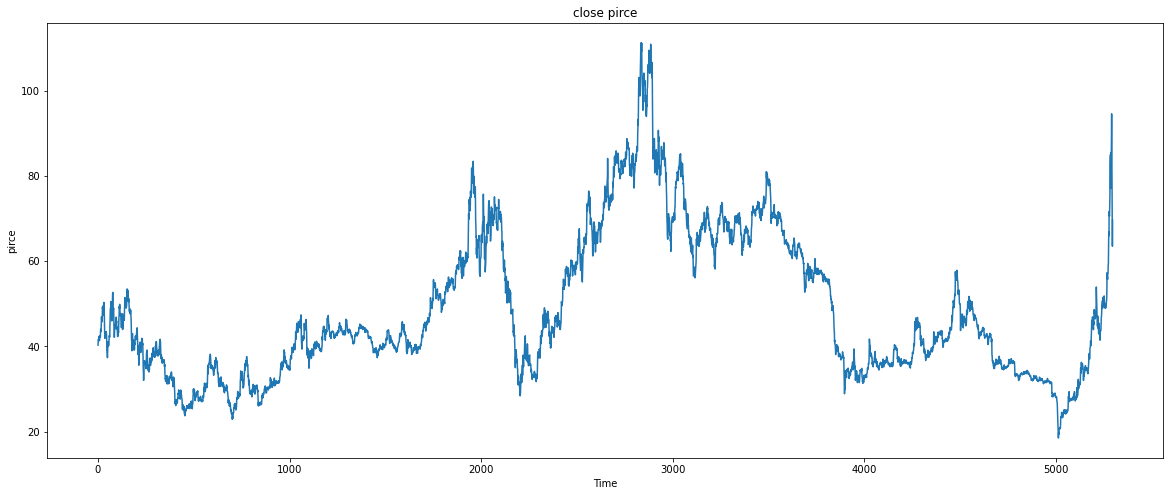

In [6]:
plt.figure(figsize=(20, 8))
plt.plot(target_data['收盤價(元)'])
plt.title('close pirce')
plt.xlabel('Time')
plt.ylabel('pirce')
plt.show()

#### 成交量

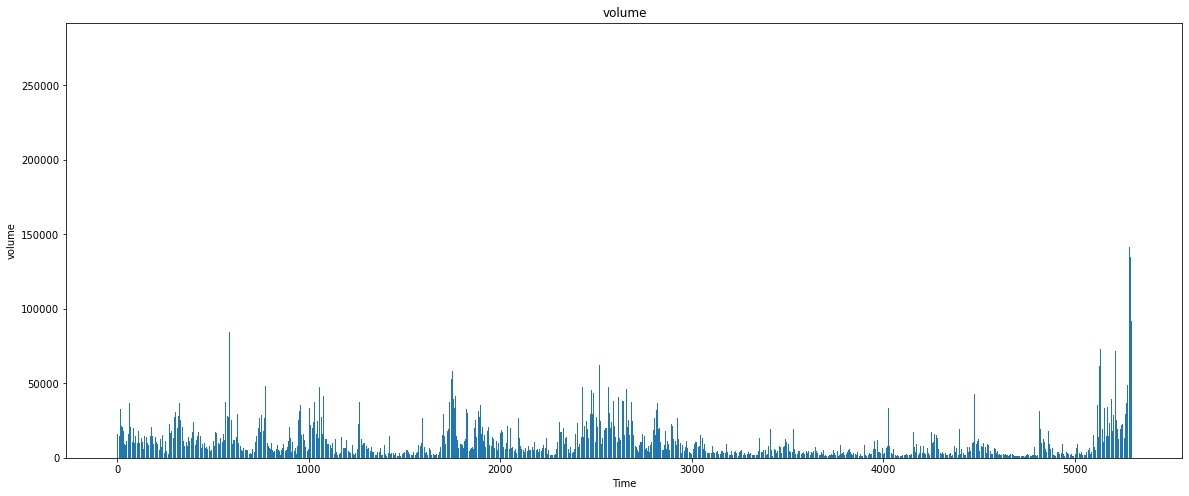

In [7]:
plt.figure(figsize=(20, 8))
plt.bar(target_data.index, target_data['成交量(千股)'])
plt.title('volume')
plt.xlabel('Time')
plt.ylabel('volume')
plt.show()

#  定態 or 非定態 - 單根檢定

In [8]:
# test_data = taget_data['收盤價(元)']

## ADF - 假設:  資料有單根(資料非定態)

In [9]:
# !pip install arch==4.15

In [10]:
from arch.unitroot import ADF

In [11]:
# ADF?

In [12]:
test_data

0       40.31
1       41.31
2       41.65
3       41.40
4       42.36
        ...  
5294    85.27
5295    77.21
5296    70.31
5297    63.51
5298    69.62
Name: 收盤價(元), Length: 5299, dtype: float64

In [13]:
# 假設:  資料有單根(資料非定態)
adf_test = ADF(test_data, max_lags=10 ,trend="c",method="BIC")
adf_test = ADF(test_data)

adf_test

Test Statistic,-1.948
P-value,0.310
Lags,29


## PP - 假設:  資料有單根(資料非定態)

In [14]:
from arch.unitroot import PhillipsPerron

# 假設:  資料有單根(資料非定態)
pp_test = PhillipsPerron(test_data)
pp_test

Test Statistic,-2.227
P-value,0.197
Lags,33


## KPSS - 假設:  資料是弱定態

In [15]:
from arch.unitroot import KPSS 

# 假設:  資料是弱定態
kpss_test = KPSS(test_data)
kpss_test

Test Statistic,2.015
P-value,0.000
Lags,43


# ACF 自我相關 && PACF 偏自我相關

In [16]:
# !pip install statsmodels==0.11.1    

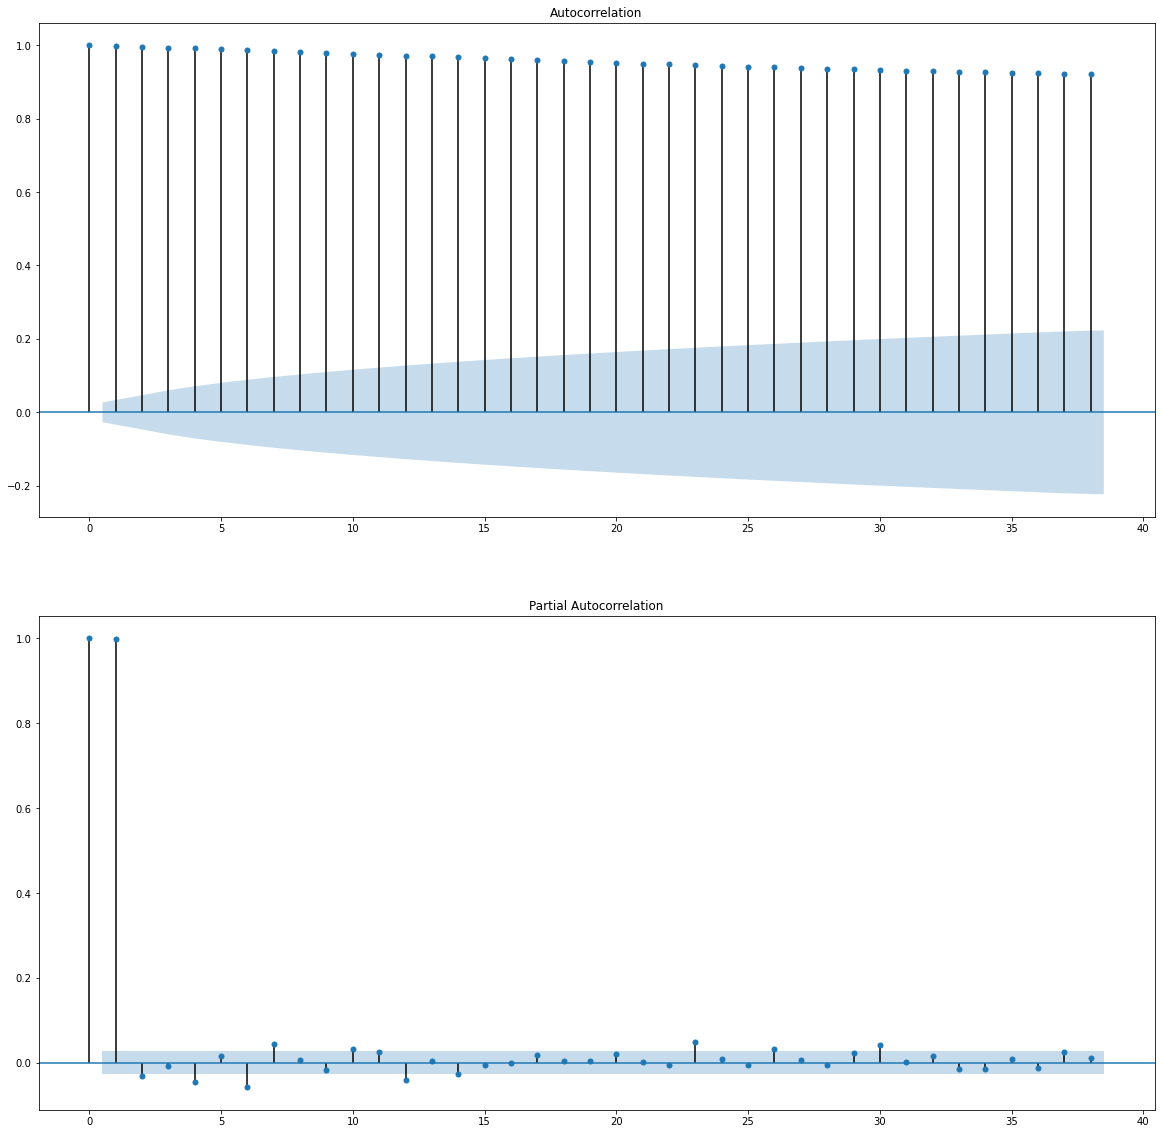

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

plot_acf(test_data, ax=ax) 
plot_pacf(test_data, ax=ax2) 
plt.show()

In [18]:
## 連第0期也有呈現

acf(test_data, qstat = True, nlags=30)

C:\Users\pured\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


(array([1.        , 0.997847  , 0.99557292, 0.99326787, 0.99078686,
        0.98836494, 0.98572403, 0.98324003, 0.98080018, 0.97827975,
        0.97591237, 0.97364474, 0.97124587, 0.9688757 , 0.96639767,
        0.96390152, 0.96141006, 0.95895578, 0.95655139, 0.95416291,
        0.95185693, 0.94958472, 0.94731249, 0.94524123, 0.94322893,
        0.94120608, 0.93932254, 0.93746192, 0.9356116 , 0.93385243,
        0.93224761]),
 array([  5279.19469455,  10535.34651832,  15768.17525377,  20975.87853814,
         26159.13208405,  31315.69736637,  36447.27605437,  41554.38400817,
         46636.23795629,  51694.48224262,  56730.19926216,  61742.08062365,
         66730.47396888,  71694.32207936,  76633.4951578 ,  81548.09811477,
         86438.56689721,  91305.46404259,  96149.00374042, 100970.07349403,
        105769.06267624, 110546.0177732 , 115303.00793295, 120040.66346997,
        124758.91457854, 129459.19139796, 134141.75397075, 138806.73524433,
        143455.07230564, 148088.326030

In [19]:
pacf(test_data, nlags=30)

array([ 1.        ,  0.99803534, -0.03202698, -0.00818785, -0.04570522,
        0.01654603, -0.05777267,  0.04421341,  0.00619816, -0.01763432,
        0.03334668,  0.02585188, -0.04007214,  0.00515554, -0.02748029,
       -0.00592392, -0.00161473,  0.0183622 ,  0.0052584 ,  0.00530457,
        0.01995669,  0.0024616 , -0.00434542,  0.0492487 ,  0.00873123,
       -0.00556918,  0.03268953,  0.00597582, -0.00521789,  0.02377059,
        0.04113153])

# 白噪音檢驗

In [20]:
from statsmodels.tsa.stattools import q_stat

ljung_box = q_stat(
    acf(test_data)[1:], 
    len(test_data)
)

C:\Users\pured\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


In [21]:
ljung_box

(array([  5279.19469455,  10535.34651832,  15768.17525377,  20975.87853814,
         26159.13208405,  31315.69736637,  36447.27605437,  41554.38400817,
         46636.23795629,  51694.48224262,  56730.19926216,  61742.08062365,
         66730.47396888,  71694.32207936,  76633.4951578 ,  81548.09811477,
         86438.56689721,  91305.46404259,  96149.00374042, 100970.07349403,
        105769.06267624, 110546.0177732 , 115303.00793295, 120040.66346997,
        124758.91457854, 129459.19139796, 134141.75397075, 138806.73524433,
        143455.07230564, 148088.32603047, 152707.02553111, 157311.74633372,
        161901.99634513, 166477.54164142, 171038.83081771, 175585.22027773,
        180117.82858752, 184637.11677038, 189143.58417216, 193637.45487299]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]))